# Newtonian Dynamics

It is introduced here the concept of force and shown how Newtonian problems, meaning that can be solved from the equation $F=ma$, can be discretized and solved using the Finite Difference method. Applications are (i) the addition of the air Drag to the gravity force on a falling rain drop; (ii) the trajectory of lapils from an explosive volcano, and (iii) the rotation of a Gyroscope (as well as the Earth). For all these systems the Kinematic, Potential and Dissipated energies are calculated. It is shown how by monitoring their values it is possible to assess the correctness of the numerical result and to find the smallest departure from the exact solution.

We leave now the kinematic world where we looked at how to compute velocity and acceleration knowing position vs. time and vice-versa. We will now consider how to calculate the forces involved, the linear and angular momentums, and extend the treatment to potential, kinematic and dissipative energies. 

### Analytical solutions for 1D Dynamics

There are few things more enjoyable than a light rain during a very hot summer. We rarely stop and think that this same rain could be dangerous elsewhere than our planet. In fact few factors make rain such an innocuous phenomena. One of them is the friction of the air. What would happen if the air would not slow rain? In this case the only force driving the rain drop would be the force of gravity. Sfter falling from a typical cloud's height (e.g. $h=2000 \: m$), its speed at the arrival to the ground would be determined by the equivalence between the potential mechanic energy that would have been turned into kinetic energy: 

\begin{equation}
g m h = \frac{1}{2} m v^2
\end{equation}

Eliminating $m$ one finds $v=\sqrt{2 g h}$, that is $200 \: m/s$, i.e. $720 \: km/h$, more than half of the speed of sound in air and certainly enough to kill a person! This is not only the velocity of a drop of water, but the velocity at which any object of any mass would have when falling without the resistance of air. On Mars the force of gravity is less, still the atmosphere is so rarefied (the density is 1\% of the one of the Earth) that an hypothetical rain from 2000 meters high, traveling at a speed next the one of a shotgun bullet, would be deadly.

Let's calculate analytically the terminal velocity of the droplets on Earth. This will allow us to have a benchmark to setup our numerical solver. We first have to solve the momentum equation. For a rigid, non deformable object, Linear and Angular momentum are defined by the product of the inertia of an object (\emph{mass} $m$ for the linear momentum, and \emph{rotational inertia} $I$ for the angular momentum) and the velocity (linear ${\bf v}$ and angular ${\bf \omega}$):

\begin{align}
{\bf p} &= m {\bf v} \\ 
{\bf f} &=\frac{d {\bf p}}{dt} = m \frac{d {\bf v}}{dt} = m {\bf a} \nonumber
\end{align} 

where ${\bf f}$ is the force applied to an object and ${\bf p}$ the linear momentum of its object. If you don't know linear momentum, intuitively it can be imagined as the \emph{tendency} of a body to keep its present motion in that direction and at its present speed. Formally the velocity is defined as the time derivative of the position of the center of mass of an object ${\bf v} = d {\bf x} / d t $.

To find the terminal velocity of the droplet we have to estimate the drag force of the air. Our physics textbook tells us that the drag exerted by a fluid to a moving object a speed $v$ can be at the first order approximated by $D=\frac{1}{2} C \rho_{fluid} A v^2$, where $A$ is the area of the section transversal to the direction of motion and C a 'shape constant'. Droplets are not rigid, but we can roughly approximate their shape to a sphere and assume that the surface tension is strong enough so that they behave like a solid. By assuming standard values, i.e. radius of the water droplet ($r=1.5\: mm$), water density ($\rho_{water}=1000\: kg/m^3$), constant for a water droplet ($C=0.6$), air density ($\rho_{air}=1.2\: kg/m^3$), we can express the momentum equation at equilibrium setting to 0: $d {\bf p} / dt = {\bf f} = 0$ for our case:    

\begin{equation}
g m - \frac{1}{2} C \rho_{fluid} A v^2 = 0
\end{equation}

which gives us the value of: $v=7.45\:m/s$, about $27 km/h$. This is the speed of droplet when it reaches the ground. 

Now that we have understood the asymptotic terms, we can investigate the dynamics using a numerical approach, and learn how to calculate a trajectory and its dynamics using Python. 

### 1-D Dynamics

First let's set the parameter values:

In [60]:
import numpy as np
import matplotlib.pyplot as plt

radius = 1.5e-3 #m
densityWater = 1000 #kg/m3
mass = 4.0/3.0*np.pi*radius**3*densityWater #kg
Const = 0.6
densityAir = 1.2 #kg/m3
Area = np.pi*radius**2 #m2

The acceleration can be calculated and integrated by using the same approach shown in the Kinematic Experience. The only complication is that the acceleration depends on the velocity (as the drag does) therefore it has to be recalculated for every time-step. This can be implemented using two arrays, one for the gravity acceleration, the other for the acceleration due to the drag.

In [61]:
tmax = 5.0; tmin = 0.0
intervals = 100; dt = (tmax-tmin) / intervals
nt = intervals + 1; time = np.arange(nt) * dt
accGravity = np.ones(nt-2) * (-10.0) #m/s2
accDrag = np.zeros(nt-2) #m/s2 

By initializing the velocity at the positive value $v_0=5.0\: m/s$ we can calculate the new value at every step, each time recalculating the drag. The direction of the drag force is always opposite to the direction of motion, therefore it has to be multiplied by $v/|v|$:

In [62]:
vy = np. zeros(nt-1)
vy[0]=0.0 #m/s
for it in np.arange(nt-2):
    accDrag[it] =  0.5*Const*densityAir*Area*vy[it]**2/mass
    if accDrag[it]>0:
        accDrag[it] *= -vy[it]/np.abs(vy[it])
    vy[it+1] = vy[it] + (accGravity[it]+accDrag[it]) * dt

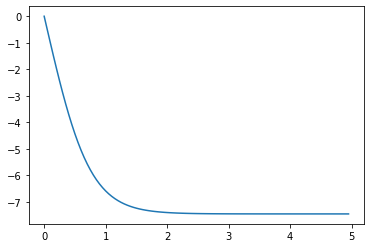

In [63]:
plt.plot(time[:-1],vy)

The solver is not vectorized here because the acceleration depends on the velocity itself. There is in effect a way to vectorize this solution, and we will see in later. With the same procedure shown previously, the 1-D trajectory can be calculated and displayed. Since the droplet was initially flying in a positive direction, it will slow down due to both gravity and drag, it will then fall down accelerated by gravity and again be slowed down by the air drag. The resulting acceleration, velocity and positions are shown here. 

Look at the plot. You should see the 1D time evolution of position (y vs. time), velocity (vy vs. time) and acceleration (a vs. time) of a drop launched towards the sky at the initial velocity of $5 m/s$. The flex done by the acceleration is due to the combination of gravity acceleration and drag force.

It is interesting to observe how the acceleration changes when the initial velocity is pointing down, up, or is zero. If initially is pointing upwards, one obtains a *plateau* in the solution of the acceleration. This happens because the drag becomes zero when the droplet reaches the highest point and the velocity (and therefore the drag) becomes zero.

### 2-D Dynamics

The above solution can be extended in a straightforward manner to 2-D. Since the drag always opposes the speed, here its vector has two components that depend on the direction in which the drop moves. Using the same material constants as in the 1D case, we need only the initial angle and velocity. 

In [64]:
theta=np.pi/3.; vel=60.0 #m/s
gx=0.0; gy=-10.0 #m/s2

In this simulation the variables and array are just a 2 dimensional extension of the past section:

In [65]:
tmax = 5.0; tmin = 0.0
intervals = 200; dt = (tmax-tmin) / intervals
nt = intervals + 1; time = np.arange(nt) * dt
aGx = np.ones(nt-2) * gx; aGy = np.ones(nt-2) * gy
aDx = np.zeros(nt-2); aDy = np.zeros(nt-2)
vx = np.zeros(nt-1); vy = np.zeros(nt-1)
vx[0]=vel*np.cos(theta); vy[0]=vel*np.sin(theta)

As we have shown in the past chapter, we would like to completely vectorize every operation since they can be executed orders of magnitude faster than using loops. I will therefore vectorize all the loops in this section, with the exception of the time integration. **Because the drag is proportional to the square of the speed, this cannot be vectorized** if not solving analytically the associated differential equation, or by using an iterative approach starting from an initial guess of the entire time dependent solution. We will see in the next chapter how to use an iterative approach for non-linear problems can be the best method for very large set-ups. Once the time evolution of the velocity is found, every other operation can be vectorized, although it requires 3-4 vector calculations. 

We can now solve the evolutionary equations in time. Check that this solver works for every value of the speed, except zero, because it would trigger a division by zero. If the initial velocity is not vertical and upward, this is however impossible:

In [66]:
for it in np.arange(nt-2):
    vMag2=vx[it]**2+vy[it]**2
    accDrag=0.5*Const*densityAir*Area*vMag2/mass
    aDx[it]=-accDrag*vx[it]/vMag2**0.5
    aDy[it]=-accDrag*vy[it]/vMag2**0.5
    vx[it+1] = vx[it]+(aGx[it]+aDx[it])*dt
    vy[it+1] = vy[it]+(aGy[it]+aDy[it])*dt

#### Exercise 1
Plot the trajectories and the velocities and accelerations for the problem above. Find the terminal speed. How long does it take to reach it? From what does the falling speed of rain drops depend? Use now a for loop to calculate the trajectory in time.

In [67]:
# here write your solution
import numpy as np
import matplotlib.pyplot as plt

px=np.zeros(nt-1)
py=np.zeros(nt-1)

for it in np.arange(nt-2):
    px[it+1]=px[it]+vx[it]*dt
    py[it+1]=py[it]+vy[it]*dt

Now that once that the velocity has been calculated, the $x-y$ trajectory can be found using only vectorized operations. In such a simple case, to vectorize the entire problem is an overkill, but for high resolution problem this optimization is essential. To formulate the solution in a vectorized form is also compact and more readable, almost like a set of equations. 

Because the next position depends on the past one, the time integration can done very efficiently by using the \pyln{cumsum} function of NumPy. The starting position of the trajectory $(0,0)$ is added using the \pyln{append} function:

#### Exercise 2
There is a function called "cumsum" in numpy that would allow you to avoid using the for loop in time. Make a first implementation. This will sensibly accelerate the code.


[ 25.95        45.70241452  61.92799964  75.80065571  87.97085715
  98.84442347 108.69434753 117.71426999 126.04710909 133.80167068
 141.06288691 147.89843555 154.36318775 160.50229351 166.35338067
 171.94815849 177.31361043 182.47289693 187.44604905 192.2505085
 196.90155311 201.41263526 205.79565361 210.06117272 214.21860173
 218.27634028 222.24189807 226.12199303 229.92263192 233.64917643
 237.3063975  240.89851996 244.42925959 247.90185431 251.31909151
 254.68333295 257.99653895 261.26029328 264.47582953 267.6440598
 270.76560572 273.84083153 276.86987846 279.85269971 282.7890949
 285.67874329 288.5212349  291.31609921 294.06283092 296.76091276
 299.40983528 302.00911367 304.55830192 307.05700423 309.50488423
 311.90167192 314.2471688  316.54125123 318.78387237 320.97506276
 323.11492989 325.20365668 327.24149937 329.22878459 331.16590603
 333.05332065 334.89154464 336.68114913 338.4227558  340.11703242
 341.76468839 343.36647033 344.9231578  346.43555907 347.90450714
 349.33085582

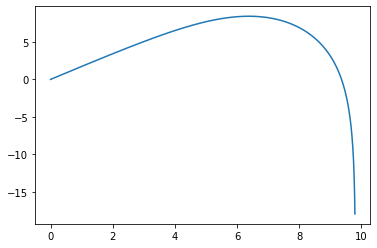

In [68]:
# here write your solution

px=np.zeros(nt-1)
py=np.zeros(nt-1)
vxAverage = 0.5 * (vx[0:nt-2] + vx[1:nt-1])
vyAverage = 0.5 * (vy[0:nt-2] + vy[1:nt-1])

for it in np.arange(nt-2):
    px[it+1]=px[it]+vxAverage[it]*dt

    # OR
    
#append adds a zero, sets the starting point     
px=np.append(px[0],np.cumsum(vxAverage*dt))
py=np.append(py[0],np.cumsum(vyAverage*dt))
 
test = np.cumsum(vxAverage)
print(test)
print(px)

plt.plot(px,py)


### Potential, Dissipated, Kinetic, Mechanical energies for the droplet

One can say that one understands a system only when one has understood its energetic formulation. That is because energy is an omnipresent entity, that cannot be created or destroyed (except when turned into mass) and therefore it is the ultimate reality behind the apparent reality. 

Let's therefore calculate the energies associated to the system above and verify that the program correctly predicts that the sum of the mechanical energy and dissipated energies do not vary during the evolution of the trajectory. This kind of *energy check* is for this case relatively straightforward, but we will see, it is much more challenging dealing with continuum mechanics. 

The kinetic energy of a moving rigid object is $K_E = \frac{1}{2} mv^2$ and can be immediately calculated as:

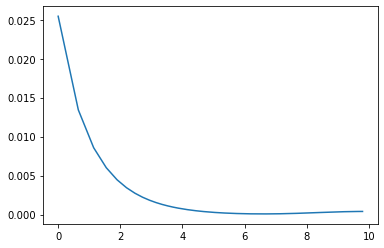

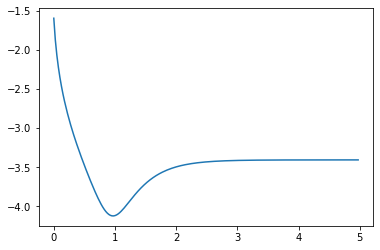

In [69]:
KE = 0.5 * mass *(vx**2+vy**2)
plt.plot(px,KE)
plt.show()
plt.plot(time[:-1],np.log10(KE))

In [70]:
KE = 0.5 * mass *(vx**2+vy**2)

The Gravitational Potential Energy $P_E = - m g y$ is the source of the energy for the entire system. When the objects falls, either the potential energy is transformed into kinetic energy by the acceleration of the drop, or it is transformed into heat, through the friction with the air, that we condense in the concept of *Drag*:  

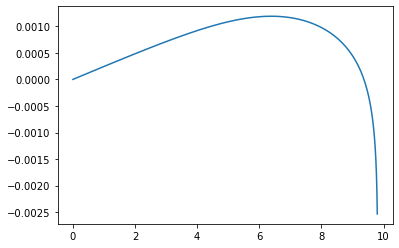

In [71]:
PE = mass*(-gy)*py
plt.plot(px,PE)

If the system is non dissipative (for the droplet, if the air exerts a negligible drag), the sum of the Kinetic energy and of the Potential Energy, called in general Mechanical Energy $M_E=K_E+K_E$, is expected to be constant. Clearly in our case this law does not hold, as we can calculate here and plot:

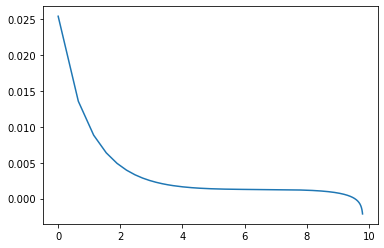

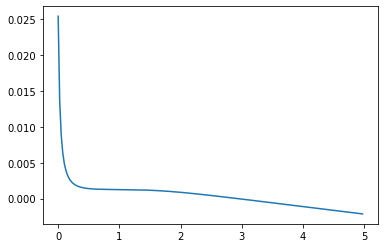

In [72]:
ME = KE+PE    
plt.plot(px,ME)
plt.show()
plt.plot(time[:-1],ME)

The Mechanical energy that is dissipated during the flight of the drop is instead converted into heat through friction. This energy can be calculated directly from the Drag Force and the kinematic variables, as it is the Work, the integral of the Power $P= D \cdot v$ in time: $W=\int D \cdot v dt = \int D \cdot dx$ where we used the fact that $v = dx/dt$. The Drag Force itself can be immediately extrapolated from the kinematic solution, as $D=ma_D$. Notice how the vectorize version of the calculation requires the calculation of the increments first, to avoid looping: 

In [73]:
pxInc = px[1:]-px[:-1]
pyInc = py[1:]-py[:-1]
WDragInc = -mass*(pxInc*aDx+pyInc*aDy)
WDrag = WDragInc.cumsum()


Finally we calculate the total energy that has always to remain constant if all the energies are taken into account. It is the sum of the Mechanical Energy and the work done by the dissipative forces, the drag in our case: $T_E = M_E + W$. 

Here, caution has to be taken in how to discretize the equations. The Mechanical energy must be calculated from the second element on. That is because the Drag is defined only when the velocity has been calculated, for the second element.

In [74]:
TotalEnergy = ME[1:] + WDrag

We can finally plot all these energies and verify that the kinetic energy increases at small velocities when the Work done by the friction of the air is small, while at steady state the Work increases linearly like the Potential Energy. The correctness of this calculation is verified by the Total Energy that remains constant during the dynamics. How correct is our numerical model can be  measured with only one number, the ratio between the maximum variation in Total Energy and its mean value:

In [75]:
print((TotalEnergy.max()-TotalEnergy.min())/TotalEnergy.mean())

6.817032496278119e-16


Which gives about $10^{-14}$ on my computer, which implies that the numerical scheme is very solid and reliable, even for a small number of intervals. 

I did not obtain this value at the first attempt. I had to rewrite and refine the solver several times, until I obtained the correct result. It would be interesting here to go through all the things that might go wrong, but it would take us off from the main goal of this lecture, which is to develop geodynamic numerical tools. It is however essential to understand for the beginner who starts working on modeling and while to obtain such a precision is essential (and sometimes not sufficient) to be certain of having written a reliable code, to obtain it requires careful work and rethinking at the developed algorithm, often rewriting the code several times. One can see here that to be a able to write a compact and fast solver in Python is essential. We can anticipate that verifications of this sort (energy, entropy) on the more sophisticated continuum mechanics system that we will consider in the next chapters will be essential to check the validity of our simulations. 

To improve the above algorithm, I had to invest time to reflect at how intermediate values had to be calculated (for velocities and acceleration). In particular, since Potential Energy depends on position and Kinetic Energy on velocity, typically they are displaced of half time. The work, if calculated using accelerations and positions is displaced of one interval from the mechanical energy, as shown in the calculation of the Total Energy. We will see in the next Experiences, how *half time step* is important in calculating precisely how bodies move and deform.  

#### Exercise 3

Calculate and plot the Total Energy, given by the sum of the Mechanical Energy and of the dissipated one. You should obtain that the Total Energy remains constant during the dynamics. To which precision do you obtain that the Total Energy is correct?

To solve this exercise, you have to Energy depends on position and Kinetic Energy on velocity, typically they are displaced of half time.

[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2   1.225 1.25  1.275 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475
 1.5   1.525 1.55  1.575 1.6   1.625 1.65  1.675 1.7   1.725 1.75  1.775
 1.8   1.825 1.85  1.875 1.9   1.925 1.95  1.975 2.    2.025 2.05  2.075
 2.1   2.125 2.15  2.175 2.2   2.225 2.25  2.275 2.3   2.325 2.35  2.375
 2.4   2.425 2.45  2.475 2.5   2.525 2.55  2.575 2.6   2.625 2.65  2.675
 2.7   2.725 2.75  2.775 2.8   2.825 2.85  2.875 2.9   2.925 2.95  2.975
 3.    3.025 3.05  3.075 3.1   3.125 3.15  3.175 3.2   3.225 3.25  3.275
 3.3   3.325 3.35  3.375 3.4   3.425 3.45  3.475 3.5   3.525 3.55  3.575
 3.6   3.625 3.65  3.675 3.7   3.725 3.75  3.775 3.8   3.825 3.85  3.875
 3.9   3.925 3.95  3.975 4.    4.025 4.05  4.075 4.

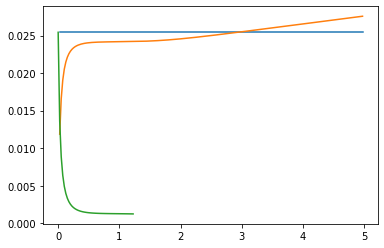

In [76]:
# here write your solution
print(time)
print(time[1:-1])

# cuts off times first and last index
plt.plot(time[1:-1],TotalEnergy)
# 
plt.plot(time[1:-1],WDrag)
plt.plot(time[:50],ME[:50])

### Exercise 4. Let's do this together:
Make a function with the solution above for a projectile and drag from air, that can be used to run thousands of trajectories, in order to model the collections of pyroclasts that would be ejected from a volcano.

[0.         0.06179688 0.12224832 0.18147028 0.23956801 0.29663723
 0.35276506 0.40803079 0.46250645 0.51625716 0.56934139 0.62181104
 0.67371135 0.72508071 0.77595044 0.82634448 0.87627925 0.92576372
 0.97479968 1.02338238 1.07150135 1.11914136 1.16628349 1.21290609
 1.2589857  1.30449779 1.34941748 1.39372004 1.43738142 1.48037851
 1.52268956 1.56429429 1.60517415 1.64531241 1.68469426 1.72330686
 1.76113932 1.79818278 1.83443031 1.86987688 1.90451933 1.93835625
 1.97138795 2.00361633 2.03504477 2.06567808 2.09552236 2.12458491
 2.15287411 2.18039936 2.20717092 2.23319987 2.25849798 2.28307764
 2.30695177 2.33013374 2.3526373  2.37447652 2.39566569 2.4162193
 2.43615197 2.45547838 2.47421326 2.49237131 2.50996721 2.52701553
 2.54353074 2.55952717 2.57501898 2.59002014 2.60454444 2.61860541
 2.6322164  2.64539046 2.65814043 2.67047886 2.68241803 2.69396999
 2.70514645 2.71595889 2.7264185  2.73653618 2.74632255 2.75578796
 2.7649425  2.77379594 2.78235784 2.79063746 2.79864378 2.80638

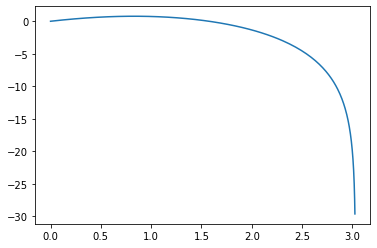

In [93]:
# Let's all work out the solution here

import random

def SingleLaunch(py0, radius, density, theta, vel,tmax,intervals):
    mass = 4.0/3.0*np.pi*radius**3*density 
    Const = 0.6
    densityAir = 1.2
    Area=  np.pi*radius**2

    tmin = 0.0
    dt = (tmax-tmin) / intervals
    nt = intervals + 1; time = np.arange(nt) * dt
    aGx = np.ones(nt-2) * gx; aGy = np.ones(nt-2) * gy
    aDx = np.zeros(nt-2); aDy = np.zeros(nt-2)
    vx = np.zeros(nt-1); vy = np.zeros(nt-1)
    vx[0]=vel*np.cos(theta); vy[0]=vel*np.sin(theta)

    for it in np.arange(nt-2):
        vMag2=vx[it]**2+vy[it]**2
        accDrag=0.5*Const*densityAir*Area*vMag2/mass
        aDx[it]=-accDrag*vx[it]/vMag2**0.5
        aDy[it]=-accDrag*vy[it]/vMag2**0.5
        vx[it+1] = vx[it]+(aGx[it]+aDx[it])*dt
        vy[it+1] = vy[it]+(aGy[it]+aDy[it])*dt
        
    px=np.zeros(nt-1)
    py=np.zeros(nt-1)
    vxAverage = 0.5 * (vx[0:nt-2] + vx[1:nt-1])
    vyAverage = 0.5 * (vy[0:nt-2] + vy[1:nt-1])
    px=np.append(px[0], np.cumsum(vxAverage*dt))
    py=np.append(py[0],py[0] + np.cumsum(vyAverage*dt))
        
    return(px,py)

(px,py) = SingleLaunch(0.,1.5e-3,1000.,np.pi/3.,5.0,5.0,200)

print(px)
plt.plot(px,py)

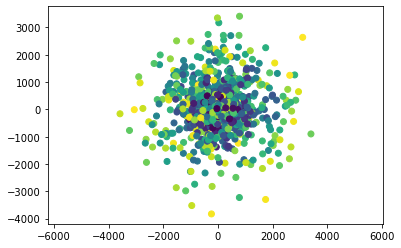

0.05179349148110812


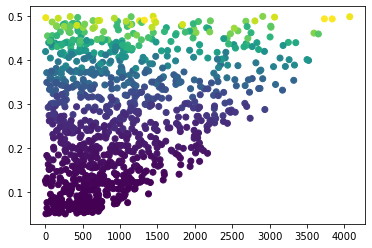

In [103]:
launches = 1000
landing =np.zeros(launches)
radii=np.zeros(launches)
mass=np.zeros(launches)

for thisTrajectory in np.arange(launches):
    radius=random.uniform(0.05,0.5)
    density=random.uniform(2000.,3000.)
    theta=random.uniform(0,np.pi/2.)
    vel=random.uniform(50.,300.)
    py0=1300.
    (px,py)=SingleLaunch(py0,radius,density,theta,vel,100.,100)
    landing[thisTrajectory]=px[py<0][0]
    radii[thisTrajectory]=radius
    mass[thisTrajectory]=4/3*np.pi*radius**3*density

phi=np.random.random(launches)*2*np.pi
plt.scatter(landing*np.cos(phi),landing*np.sin(phi),c=radii)
plt.axis('equal')
plt.show()

print(radius)
plt.scatter(landing,radii,c=mass)
plt.show()


## Gyroscope Precession

As discovered by Kepler, the planets orbit on ellipses with the Sun at one focus, all revolving in the same direction. At the same time they spin around their axis. Newtonian dynamics teaches us that every object that is rotating around its axis in the space is also precessing at a much slower speed that depends on the 3 principal moments of inertia. We can use the techniques just learned to model 1D Newtonian Dynamics to model how the rotation of a planet generates precession. 

For rotating objects, the linear momentum equations have an angular analogue where *force* is replaced by *torque* and *linear momentum* by *angular momentum*:

\begin{align}
\label{angularMomentum}
{\bf L} &= I {\bf \Omega} \\ 
{\bf T} &= \frac{d {\bf L}}{dt} = I \frac{d {\bf \Omega}}{dt} \nonumber
\end{align}

where ${\bf T}$ is the Torque vector, equal to ${\bf T}={\bf r} \times {\bf f}$ and ${\bf L}$ is the angular momentum vector. In analogy to linear momentum, the angular momentum is the tendency of an object to continue to rotate around its present axis and at its present rotating speed. Formally the angular velocity is the time derivative of the angular displacement ${\bf \Omega} = d {\bf \theta} / dt$, taking the rotation axis that passes through the center of mass. The moment of Inertia depends instead from the shape of the object and it is proportional to its mass.

A peculiar characteristic of rotational dynamics is the precession. While objects moving in a linear trajectory can only accelerating or decelerating in the three direction of the space, a rotating object, if undergoing a force non aligned with its axis, they will display a dynamics characterized by two (or more) rotational dynamics, one around its original axis and the others around other axis. Normally these rotations are slower. Precession is one of them. 

A gyroscope precesses (or processes) due to the torque applied by the force of gravity to the inclined axis of rotation. We will quantify this complex process by and visualizing in 3D using MatPlotLib. In order to do that let's use an extra module that defines a class of 3D arrows objects. Patches associated to the special arrow are here \url{http://matplotlib.org/api/patches_api.html}.

In [ ]:
import numpy as np
from numpy.linalg import norm
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt

class Arrow3D(FancyArrowPatch):
	def __init__(self, xs, ys, zs, *args, **kwargs):
		FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
		self._verts3d = xs, ys, zs
	def draw(self, renderer):
		xs3d, ys3d, zs3d = self._verts3d
		xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
		self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
		FancyArrowPatch.draw(self, renderer)

       

First we need to define all the constants. The mass and moment of inertia of the gyroscope are given. **theta** is the initial angle $\theta$ of inclination of the gyroscope and **omega** the angular velocity $\omega$. **L** and **r** represent the time evolution of 3D vectors, so they are 2D arrays.

In [ ]:
m=1.0; I=1.0; theta=-np.pi/20
g=np.array([0.,0.,-10.0]); omega=10 #rad/s
nt=101; timeTot=2*np.pi; dt=timeTot/nt; time=np.arange(nt)*dt

L=np.zeros((nt,3),float)
r=np.zeros((nt,3),float)

We can further simplify the equations based on the fact that $=I {\bf \Omega}= I \omega {\bf r}$ where we assumed that the angular speed $\omega$ does not change in time (a real gyroscope will instead slow down due to frictional forces, but we neglect it as we want to apply this problem to the precession of the Earth). Because the $\omega$ does not change, only ${\bf r}$ will evolve in time.

Initially the axis of rotation is ${\bf r}=\left(0.,\sin(\theta),\cos(\theta)\right)$, where obviously $|r|=1$. The gravity force can be written as ${\bf f}=m{\bf g}$. 

In [ ]:
F=m*g
r[0]=np.array([0.,np.sin(theta),np.cos(theta)])
L[0]=omega*I*r[0]

Let's now express the Angular Momentum as in equation \eq{angularMomentum} by reformulating the increment in time of the angular momentum as $d{\bf L}={\bf T} dt$. Because ${\bf T}={\bf r} \times {\bf f}$, we can just add this quantity at every time step and calculate the evolution of the angular momentum. In finite differences this becomes:
\begin{equation}
	\Delta {\bf L}= {\bf T} \: \Delta t = ({\bf r} \times {\bf f}) \: \Delta t 
\end{equation} 
A first intuitive calculation of the evolution in time of the Angular Momentum can be done as a \emph{forward} integration. If we do that the formulation is very simple:


In [ ]:
for it in np.arange(1,nt):
	Tau=np.cross(r[it-1],F)
	L[it]=L[it-1]+Tau*dt
	r[it]=norm(r[it-1])*L[it]/norm(L[it])
print(L[60])

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(L[:,0],L[:,1],L[:,2],color="g",s=100) 
ax.scatter(0,0,0,color="g",s=100)

for it in np.arange(1,nt,10):  #plot every 10 steps
	a = Arrow3D([0,L[it,0]],[0,L[it,1]],[0,L[it,2]], 
		mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)

You will find that it is not what we expected. That is because the axis of the rotation changes inclination. Like for the calculation of the trajectory, the evolution of the angular momentum requires the correction of a posteriori of the calculation of the torque, that in itself depends on the axis of rotation. 

### Exercise 5

Correct the above formulation of the **for** loop.

In [ ]:
# Insert here your solution:




In [ ]:
# plot here your corrected solution




You should find that an acceptable solution is obtained through one single iteration. For applications on real problems successive iterations can be implemented until full convergence is obtained. 

The solution can be compared also with the analytical one, that arises from the estimation of the precession speed $\Omega=d \phi/dt$:

\begin{equation}
d \phi = \frac{dL}{L \sin \theta} = \frac{T \: d t}{L \sin \theta} = \frac{M g r \sin \theta \: dt}{I \omega \sin \theta} = \frac{M g r\: dt}{I \omega} 
\end{equation} 

Therefore $\Omega = \frac{M g r}{I \omega}$. With our (carefully crafted) parameters $\Omega=1.0 \: rad/s$, which implies that in a time interval of $2\pi\: s$ as in our case there will be exactly one precession.

### Exercise 6

Compare your numerical solution with the analytical one here above.

In [ ]:
# add your your solution




For the Earth the precession is extremely slow and controlled by the difference between the Principal Momentum of Inertia that goes from one pole to the other, and one of the principal ones associated to one of the axis that cross the Earth at the equator. The velocity of precession proportional to this difference, which makes the speed of precession of the order of 26 thousands years. 